In [22]:
import pandas as pd

# 读取数据
data = pd.read_csv('data\\raw\\test_scores.csv')

# 显示数据集的前几行
print(data.head())



  school school_setting school_type classroom teaching_method  n_student  \
0  ANKYI          Urban  Non-public       6OL        Standard       20.0   
1  ANKYI          Urban  Non-public       6OL        Standard       20.0   
2  ANKYI          Urban  Non-public       6OL        Standard       20.0   
3  ANKYI          Urban  Non-public       6OL        Standard       20.0   
4  ANKYI          Urban  Non-public       6OL        Standard       20.0   

  student_id  gender             lunch  pretest  posttest  
0      2FHT3  Female  Does not qualify     62.0      72.0  
1      3JIVH  Female  Does not qualify     66.0      79.0  
2      3XOWE    Male  Does not qualify     64.0      76.0  
3      556O0  Female  Does not qualify     61.0      77.0  
4      74LOE    Male  Does not qualify     64.0      76.0  


In [23]:
# 显示数据集的信息
print(data.info())

# 显示数据集的描述性统计
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1984 non-null   object 
 1   school_setting   1984 non-null   object 
 2   school_type      1984 non-null   object 
 3   classroom        1984 non-null   object 
 4   teaching_method  1984 non-null   object 
 5   n_student        1984 non-null   float64
 6   student_id       1984 non-null   object 
 7   gender           1984 non-null   object 
 8   lunch            1984 non-null   object 
 9   pretest          1984 non-null   float64
 10  posttest         1984 non-null   float64
dtypes: float64(3), object(8)
memory usage: 170.6+ KB
None
         n_student      pretest    posttest
count  1984.000000  1984.000000  1984.00000
mean     22.769153    54.980847    67.12500
std       4.248477    13.558027    13.93532
min      14.000000    22.000000    32.00000
25%      20.0000

In [2]:
# 检查每列的缺失值数量
print(data.isnull().sum())


school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64


In [3]:
# 查看类别变量的唯一值和分布情况
print(data['school'].value_counts())
print(data['school_setting'].value_counts())
print(data['school_type'].value_counts())
print(data['classroom'].value_counts())
print(data['teaching_method'].value_counts())
print(data['gender'].value_counts())
print(data['lunch'].value_counts())


school
GOOBU    147
QOQTS    134
UKPGS    118
DNQDD    110
ZOWMK    109
VVTVA    107
GJJHK    107
CCAAW    102
KZKKE    100
CUQAM     99
VKWQH     95
IDGFP     86
UUUQX     83
UAGPU     80
OJOBU     77
CIMBB     70
ZMNYA     65
GOKXL     60
LAYPA     55
KFZMY     51
VHDHF     47
FBUMG     44
ANKYI     38
Name: count, dtype: int64
school_setting
Urban       841
Suburban    665
Rural       478
Name: count, dtype: int64
school_type
Public        1463
Non-public     521
Name: count, dtype: int64
classroom
ZBH    29
18K    29
YTB    28
Q0E    28
0N7    28
       ..
J6X    15
JGD    14
SSP    14
P2A    14
197    13
Name: count, Length: 97, dtype: int64
teaching_method
Standard        1274
Experimental     710
Name: count, dtype: int64
gender
Male      1011
Female     973
Name: count, dtype: int64
lunch
Does not qualify                    1135
Qualifies for reduced/free lunch     849
Name: count, dtype: int64


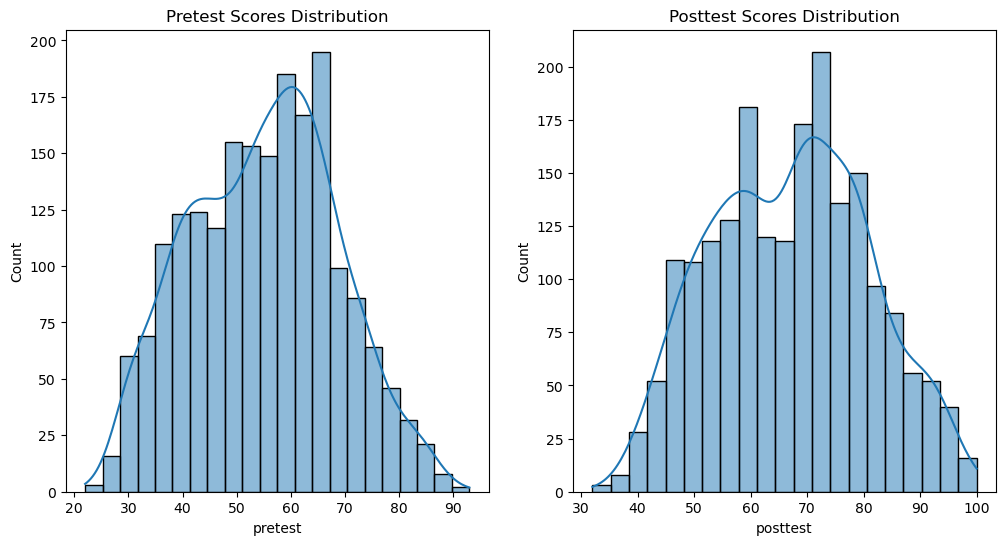

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制数值变量的分布图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['pretest'], kde=True)
plt.title('Pretest Scores Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['posttest'], kde=True)
plt.title('Posttest Scores Distribution')

plt.show()


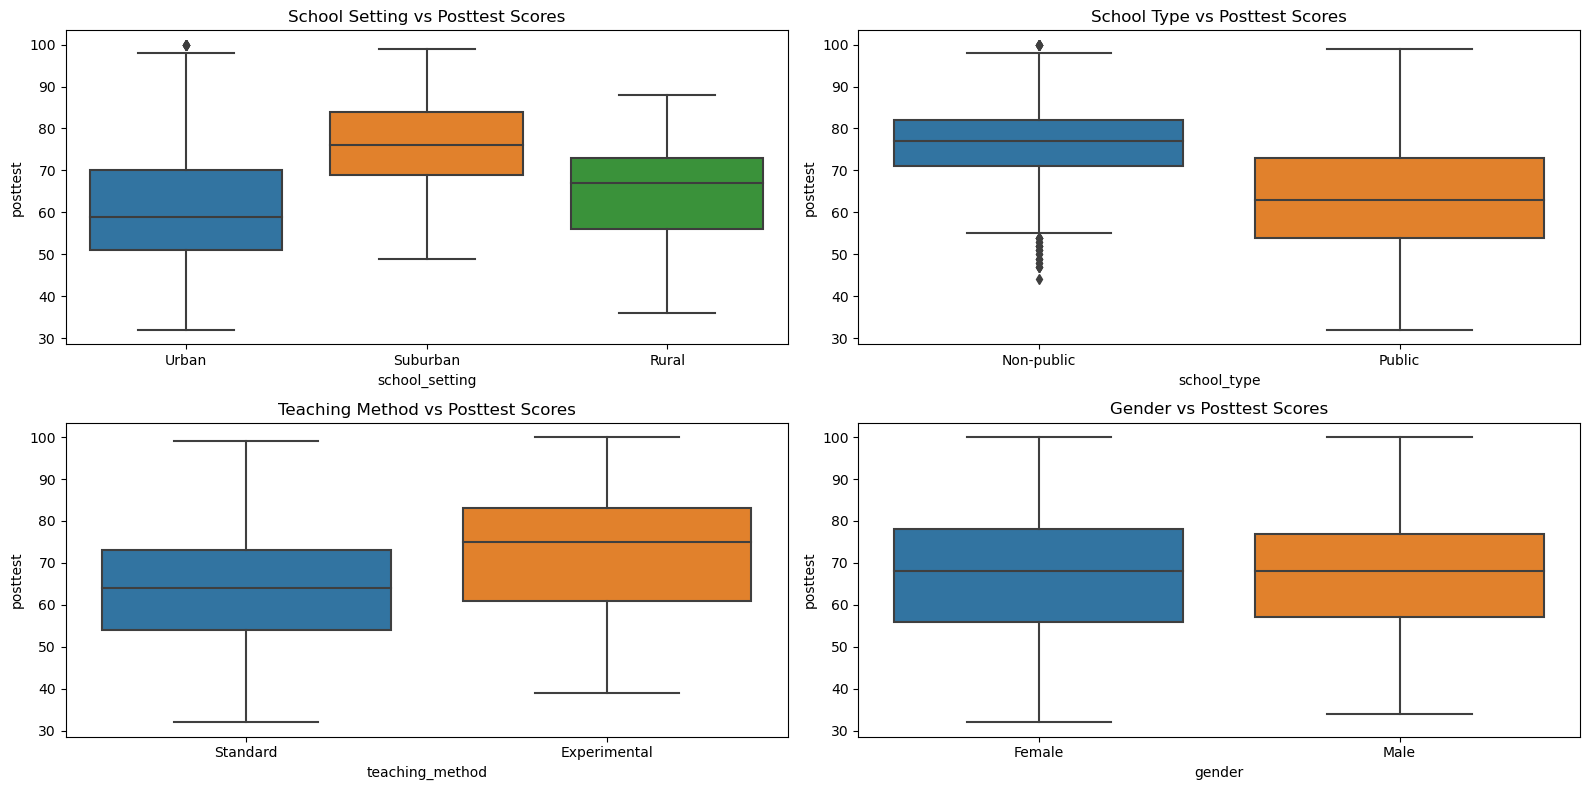

In [5]:
# 绘制类别变量与数值变量之间的关系图
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='school_setting', y='posttest', data=data)
plt.title('School Setting vs Posttest Scores')

plt.subplot(2, 2, 2)
sns.boxplot(x='school_type', y='posttest', data=data)
plt.title('School Type vs Posttest Scores')

plt.subplot(2, 2, 3)
sns.boxplot(x='teaching_method', y='posttest', data=data)
plt.title('Teaching Method vs Posttest Scores')

plt.subplot(2, 2, 4)
sns.boxplot(x='gender', y='posttest', data=data)
plt.title('Gender vs Posttest Scores')

plt.tight_layout()
plt.show()


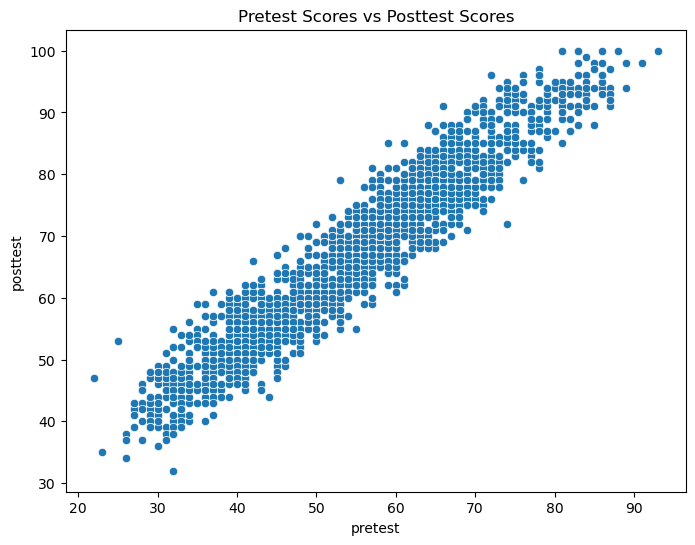

In [6]:
# 绘制数值变量之间的关系图
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pretest', y='posttest', data=data)
plt.title('Pretest Scores vs Posttest Scores')
plt.show()


In [11]:
# 自动检测类别变量（object类型）
categorical_columns = data.select_dtypes(include=['object']).columns

# 创建一个字典来存储每个变量的编码器
label_encoders = {}

# 对每个类别变量进行编码
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 显示编码后的数据
print(data.head())

   school  school_setting  school_type  classroom  teaching_method  n_student  \
0       0               2            0         22                1       20.0   
1       0               2            0         22                1       20.0   
2       0               2            0         22                1       20.0   
3       0               2            0         22                1       20.0   
4       0               2            0         22                1       20.0   

   student_id  gender  lunch  pretest  posttest  
0         144       0      0     62.0      72.0  
1         198       0      0     66.0      79.0  
2         217       1      0     64.0      76.0  
3         285       0      0     61.0      77.0  
4         395       1      0     64.0      76.0  


                   school  school_setting  school_type  classroom  \
school           1.000000       -0.081792     0.330368  -0.049648   
school_setting  -0.081792        1.000000    -0.084584   0.080853   
school_type      0.330368       -0.084584     1.000000   0.135485   
classroom       -0.049648        0.080853     0.135485   1.000000   
teaching_method -0.038016        0.085887     0.144686  -0.024865   
n_student        0.175552        0.511191     0.549248   0.031869   
student_id       0.026006       -0.023217     0.042933  -0.043472   
gender          -0.012534       -0.027886     0.021742  -0.000283   
lunch            0.006839        0.039314     0.168874   0.114248   
pretest         -0.113107       -0.128466    -0.355418  -0.034590   
posttest        -0.107609       -0.146266    -0.367656  -0.026858   

                 teaching_method  n_student  student_id    gender     lunch  \
school                 -0.038016   0.175552    0.026006 -0.012534  0.006839   
school_settin

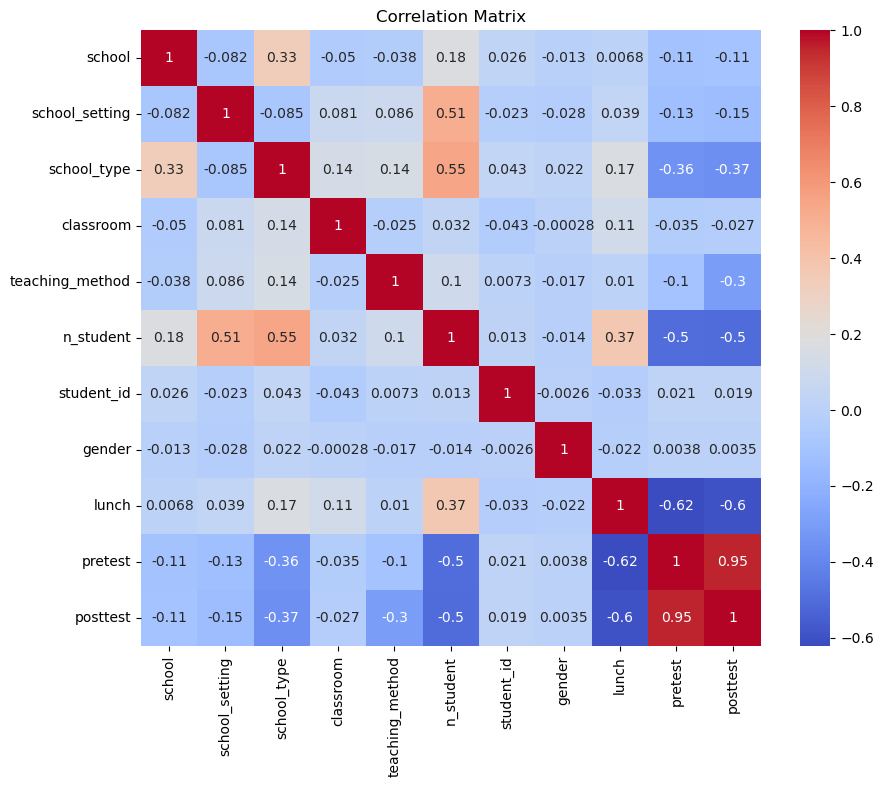

In [12]:
# 计算相关系数矩阵
correlation_matrix = data.corr()
print(correlation_matrix)

# 可视化相关系数矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


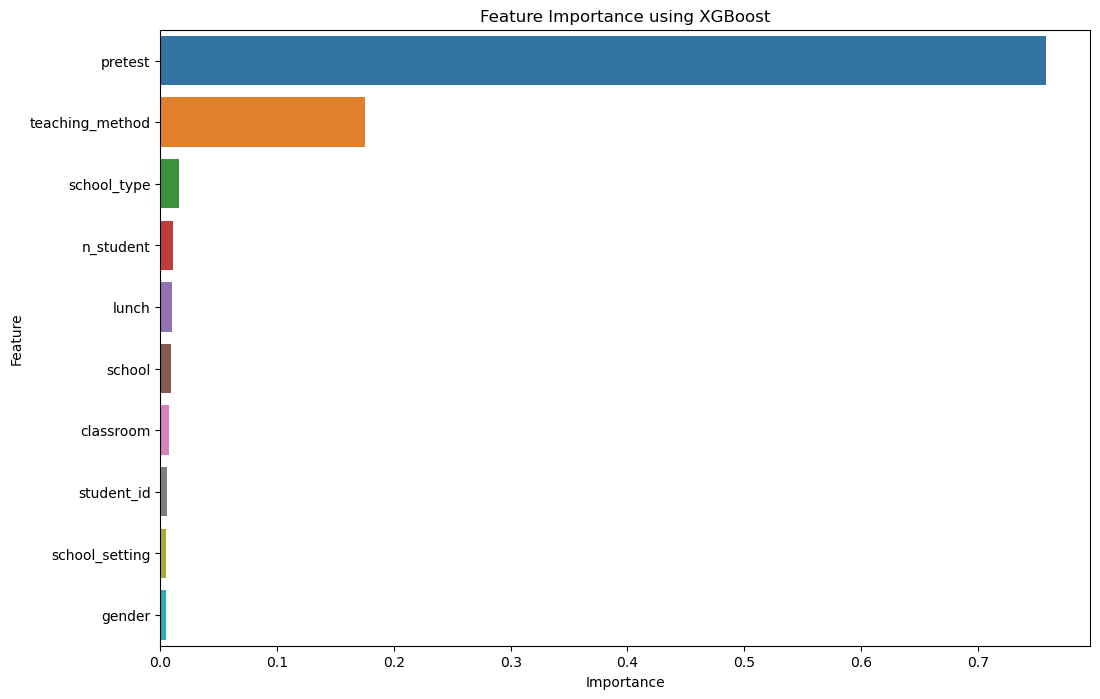

In [13]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# 准备特征和目标变量
X = data.drop(['posttest'], axis=1)
y = data['posttest']

# 创建XGBoost模型，减少树的数量
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, random_state=42)
model.fit(X, y)

# 获取特征重要性
feature_importances = model.feature_importances_

# 创建特征重要性数据框
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 按重要性排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance using XGBoost')
plt.show()
